# Data Science with Python
## Chapter 2 Introduction to Scikit-Learn and Model Evaluation
* Response variables and data imbalances
* Performance metrics
* Scikit learn: 
    * logistic regression
    * Train / test split
    * True and False Positive/Negative rates
    * ROC AUC Score (Receiver Operator Characteristic - Area Under the Curve)
    

In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing and configuring matplotlib

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('.\Data\Chapter_1_cleaned_data.csv')

In [3]:
df['default payment next month'].mean()

0.2217971797179718

---

The column 'default payment next month' presents a **binary classification** problem (0 or 1, yes or no, default or not)

___

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

### Scikit | Logistic Regression Model

Logistic regression models themselves are not classifiers. They present a propability of an event occuring. Specifying a cutoff value yields a classifier, however.

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
my_lr = LogisticRegression() # instantiate the class

In [7]:
my_lr

LogisticRegression()

In [8]:
my_new_lr = LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, 
                            intercept_scaling = 1, max_iter = 100, multi_class = 'auto', 
                            n_jobs = None, penalty = 'l2', random_state = None, solver = 'warn', 
                            tol = 0.0001, verbose = 0, warm_start = False) # use Shift + Tab to see Docstring

In [9]:
my_new_lr

LogisticRegression(solver='warn')

In [10]:
my_new_lr.C = 0.1 # updating a hyperparameter
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

Creating x and y values to test the classification

In [11]:
X = df['EDUCATION'][0:10].values.reshape(-1, 1)

In [12]:
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [13]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [15]:
#my_lr.fit(X, y)

In [16]:
new_X = df['EDUCATION'][10:20].values.reshape(-1, 1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [17]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

---

The model predicted all 0s. While that makes it right 80% if the time (see below), if the 1s wee important, it wouldn't have predicted any of them

---

In [18]:
#True Values
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

## Synthetic Data for Linear Regression 
Creating a dataset of type `y = slope * x + random noise + intercept`

In [19]:
np.random.seed(seed = 1)
X = np.random.uniform(low = 0.0, high = 10.0, size = (1000, )) # "uniform" is one type of random distribution 
X[0:20]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00])

In [20]:

np.random.seed(seed = 1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc = 0.0, scale = 1.0, size = (1000, )) + intercept 
# "normal" is another type of random distribution

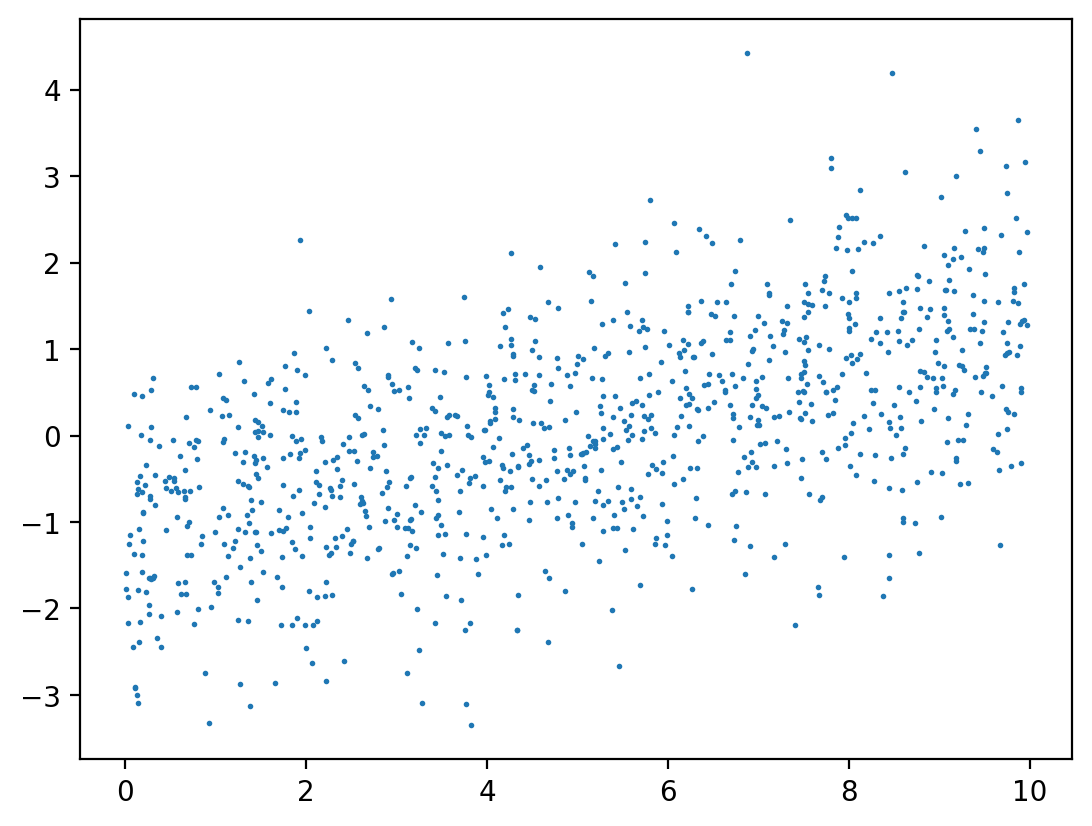

In [21]:
plt.scatter(X, y, s = 1)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [24]:
X.shape, y.shape

((1000,), (1000,))

In [25]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [26]:
y_pred = lin_reg.predict(X.reshape(-1, 1))

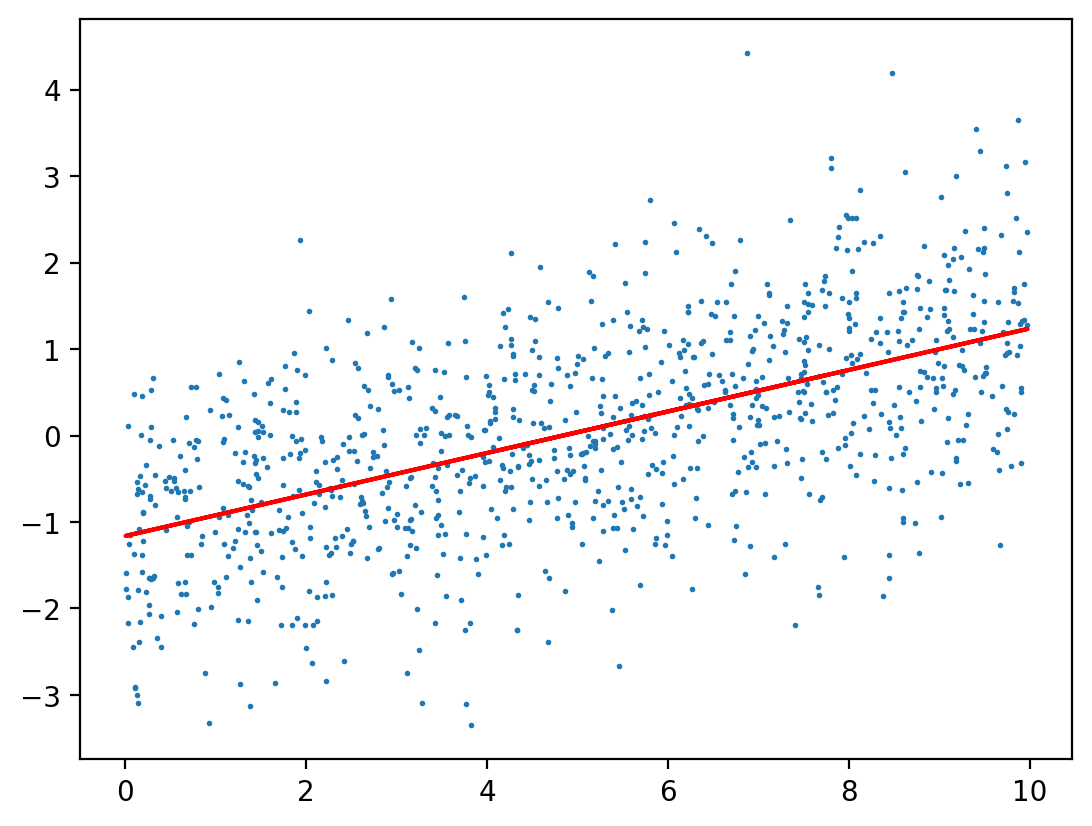

In [27]:
plt.scatter(X, y, s = 1)
plt.plot(X, y_pred, 'r')

### Splitting the Data | Training and Testing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [29]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21331, 1) (5333, 1)
(21331,) (5333,)


###### check if train and test data are similar

In [30]:
np.mean(y_train)

0.223102526838873

In [31]:
np.mean(y_test)

0.21657603600225014

In [32]:
example_lr = LogisticRegression(C = 0.1, solver = 'liblinear')

In [33]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [34]:
y_pred = example_lr.predict(X_test)

In [35]:
np.mean(y_pred == y_test) # accuracy test using logical mask

0.7834239639977498

In [36]:
# Other methods
example_lr.score(X_test, y_test)

0.7834239639977498

In [37]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

#### True Positive Rate TPR, False Negative Rate FNR and Confusion Matrix

In [38]:
P = sum(y_test)
P #positives

1155

In [39]:
TP = sum((y_test == 1) & (y_pred == 1))
TP # true positives

0

In [40]:
TPR = TP / P
TPR #true positive rate

0.0

The model simply predicts "0" every time, leading to ca. 80% accuracy, but resulting in no positive predictions

In [41]:
FN = sum((y_test == 1) & (y_pred == 0))
FN # false negatives

1155

In [42]:
FNR = FN / P
FNR # false negative rate

1.0

In [43]:
N = sum(y_test == 0)
N # Negatives

4178

In [44]:
TN = sum((y_test == 0) & (y_pred == 0))
TN # true negatives

4178

In [45]:
FP = sum((y_test == 0) & (y_pred == 1))
FP # false positives

0

In [46]:
TNR = TN / N
FPR = FP / N
print ('The true negative rate is {} and the false positive rate is {}.'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0.


### A confusion matrix
![image of a confusion matrix](https://miro.medium.com/v2/resize:fit:828/format:webp/1*fxiTNIgOyvAombPJx5KGeA.png)
From [towardsdatascience.com](https://miro.medium.com/v2/resize:fit:828/format:webp/1*fxiTNIgOyvAombPJx5KGeA.png)

In [47]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [48]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [49]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Four bins --> four levels of education. At each level of education, the model predicts a propability that is below 50%. If the cutoff/threshold were lower, more samples would be classified as positive. (which will eventually lead to more false positives, too. There is no clearly right answer here, definitel tradeoffs)

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

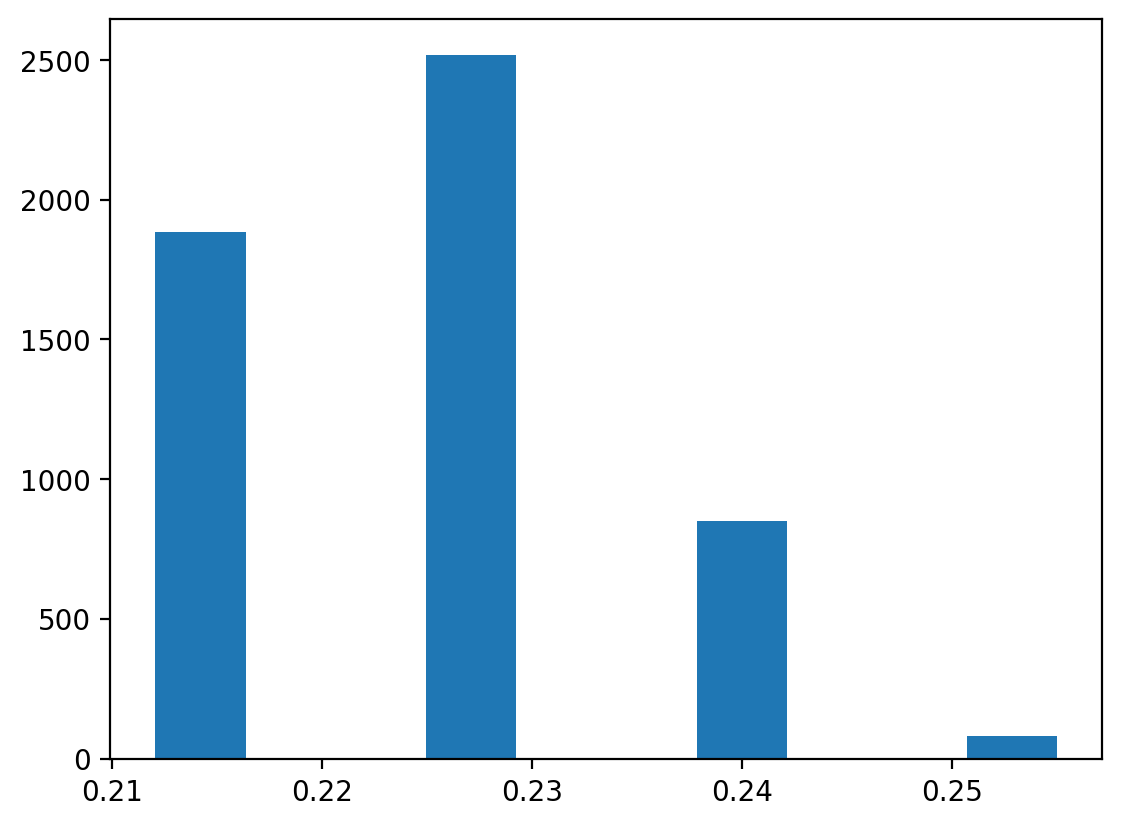

In [50]:
plt.hist(pos_proba)

---

Visualizing actual positive/negative values per bin:

---

In [51]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]
pos_sample_pos_proba

array([0.22576598, 0.24007604, 0.21207085, ..., 0.21207085, 0.22576598,
       0.21207085])

Text(0, 0.5, 'Number of samples')

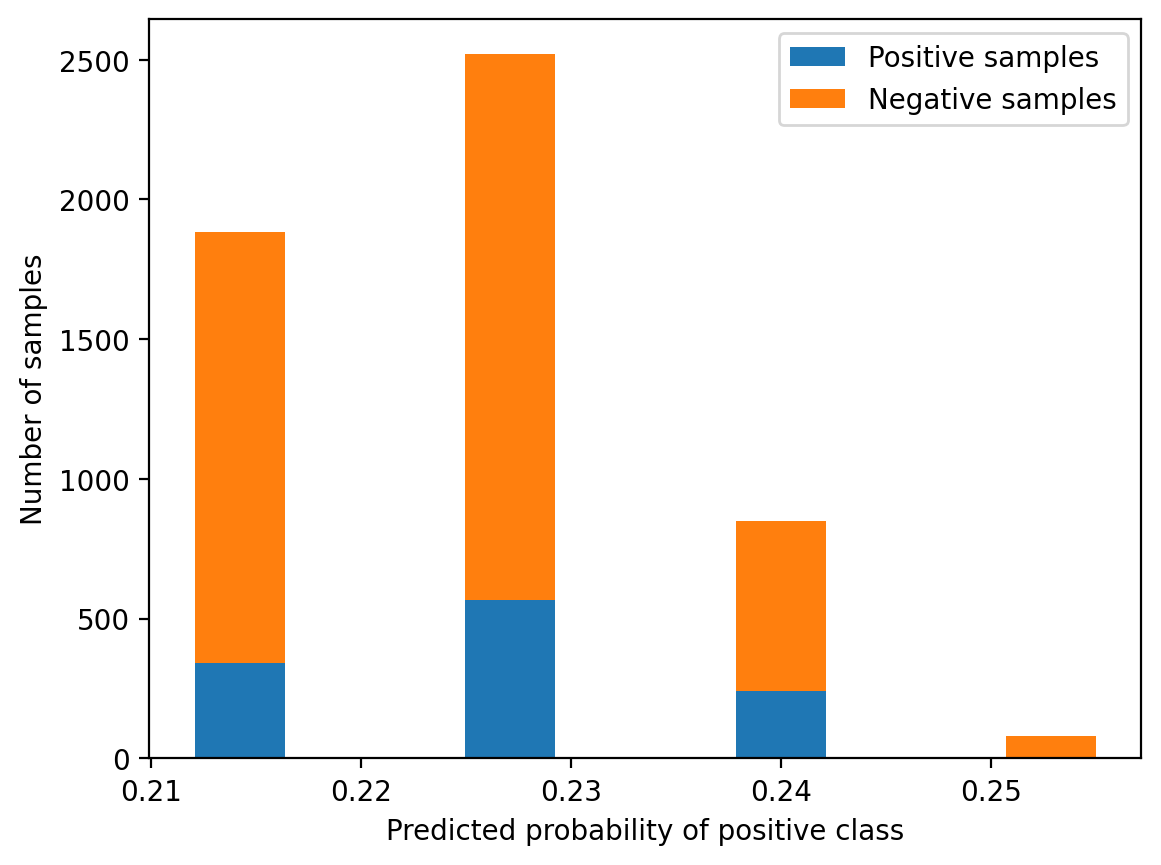

In [52]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

### Receiver Operating Characteristic (ROC) Curve
By stepwise lowering the threshold from 1 to 0, the corresponding pairs of True Positive Rate (y-axis) and False Positive Rate (x-axis) can be plotted. A threshold of 1 will result in only negative predictions, i.e. neither false positives nor true positives (0,0). Threshold of 0 means the opposite.

The more the curve "hugs" the top left of the plot, the better the model performance. The closer to a 45° line from (0, 0) (see below), the more it behaves like a coinflip. 


In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

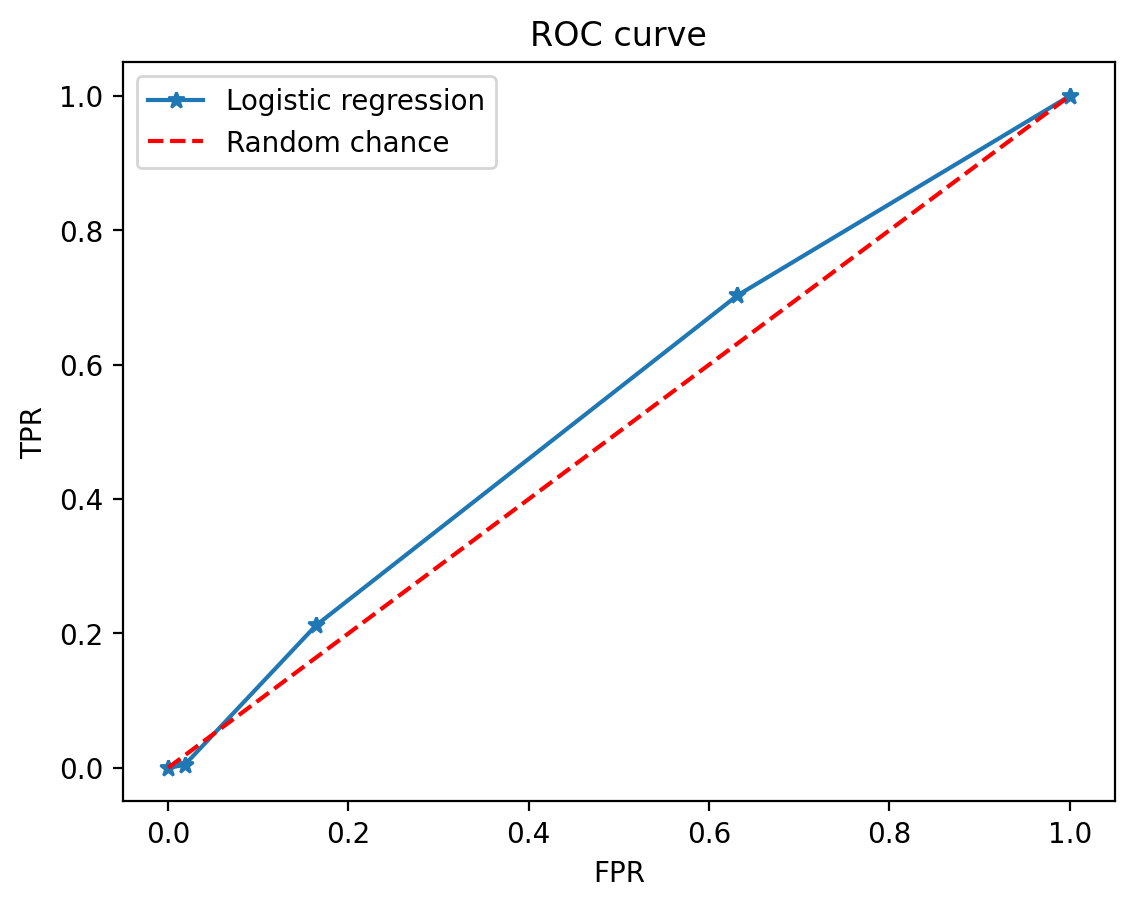

In [54]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [55]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

## ROC Area under the curve (ROC AUC)
Important metric also known as the C-statistic. anything close to 0.5 is no better than a coin flip (see dashed red line, integral = 0.5). Anything close to 1 is ideal --> ROC Curve 'hugs' the top left corner, meaning many true positives and few false positives for a given threshold.

In [56]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

Precision = True Positives / ( True Positives + False Positives) 
for any given threshold. Lowering the threshold inrcreases both TP and FP. Precision is a measure of which of them increases more quickly

A ROC AUC Score of 54% is not much better than a coin flip*. Better features have to be chosen, but this was valuable to me to learn about metrics and applying linear regression models


**To be precise, in this case a coin flip would be wrong most of the time, because overall propabilities for true positives are around 20%, not 50%*

In [57]:
metrics.precision_recall_curve(y_test, pos_proba)

(array([0.21657604, 0.23536232, 0.26315789, 0.06097561, 1.        ]),
 array([1.        , 0.7030303 , 0.21212121, 0.004329  , 0.        ]),
 array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ]))

## New Model based on Credit Limit
Using linear Regression model on Credit data >> examining the feature "LIMIT_BAL"

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [59]:
np.mean(y_train), np.mean(y_test) # check if test and train set are similar

(0.223102526838873, 0.21657603600225014)

In [60]:
limit_bal_lr = LogisticRegression(C = 0.1, solver = 'liblinear')

In [61]:
limit_bal_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [62]:
y_pred = limit_bal_lr.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, y_pred) # Accuracy of 80% seems good, but let's check ROC AUC score

0.7834239639977498

In [64]:
y_pred_proba = limit_bal_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [65]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644178, 0.05409607, 0.10175036, 0.14940464, 0.19705893,
        0.24471322, 0.29236751, 0.34002179, 0.38767608, 0.43533037,
        0.48298465]),
 <BarContainer object of 10 artists>)

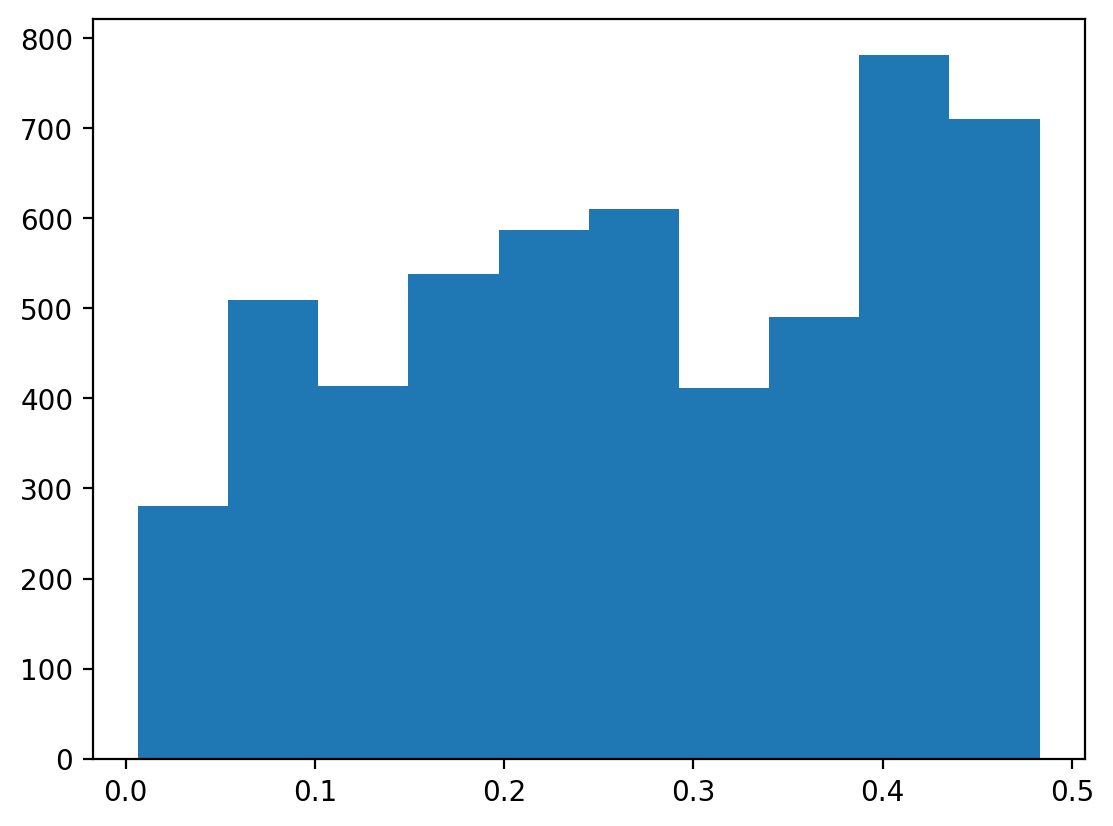

In [66]:
plt.hist(pos_proba)

In [67]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]
pos_sample_pos_proba

array([0.20395547, 0.07935404, 0.26477132, ..., 0.25173076, 0.44911106,
       0.33606566])

Text(0, 0.5, 'Number of samples')

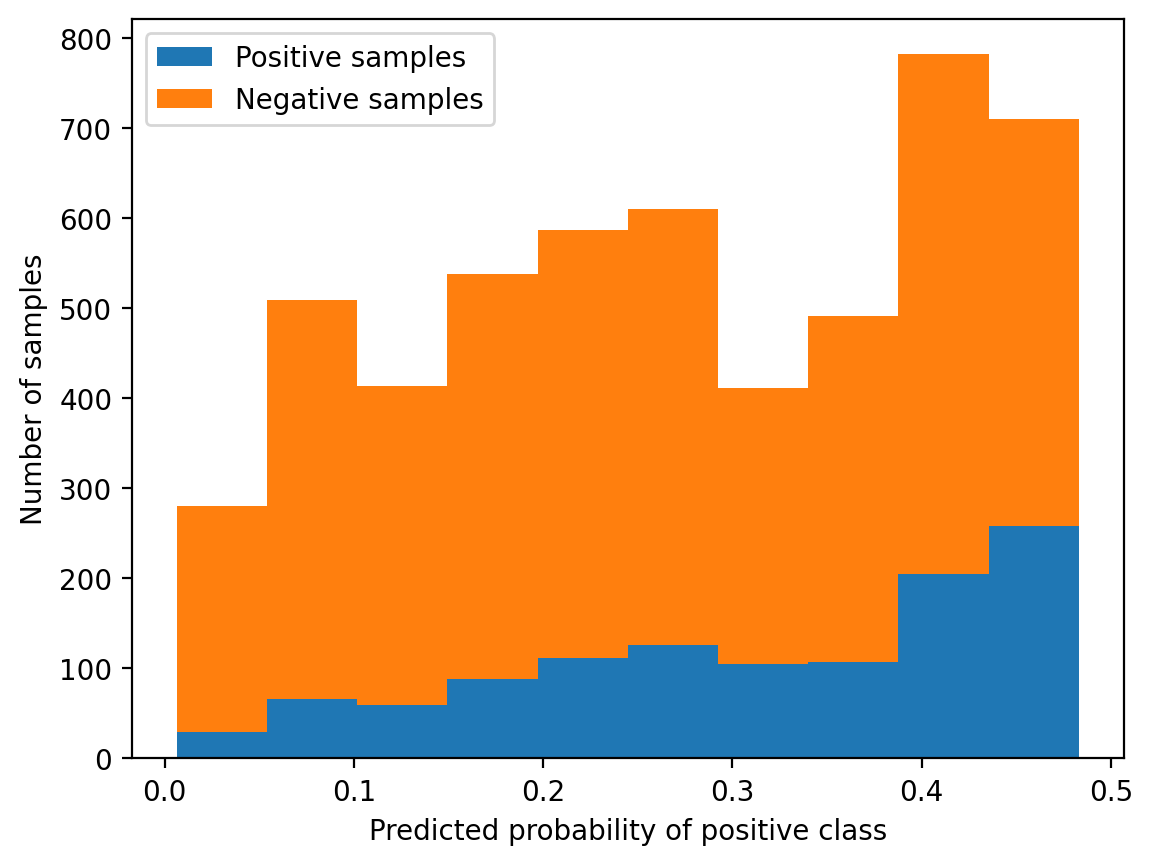

In [68]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

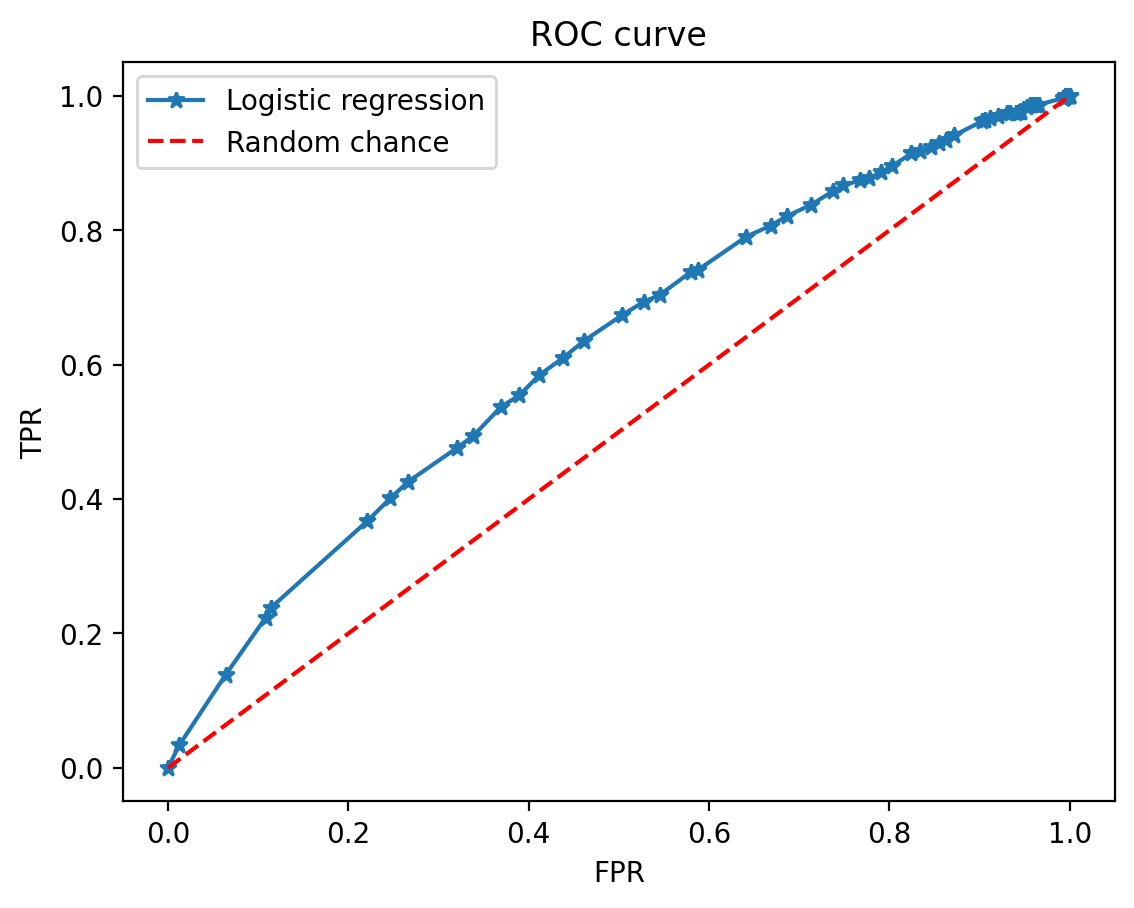

In [70]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [71]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [72]:
metrics.roc_auc_score(y_test, pos_proba) # "LIMIT_BAL" seems like a much better feature

0.6201990844642832

In [73]:
precision_metric = metrics.precision_recall_curve(y_test, pos_proba)
# or use this:

In [74]:
precision, recall, threshold_3 = metrics.precision_recall_curve(y_test, pos_proba)

And then use the following to calculate area under the curve

In [75]:
metrics.auc(recall, precision)

0.31566964427378624

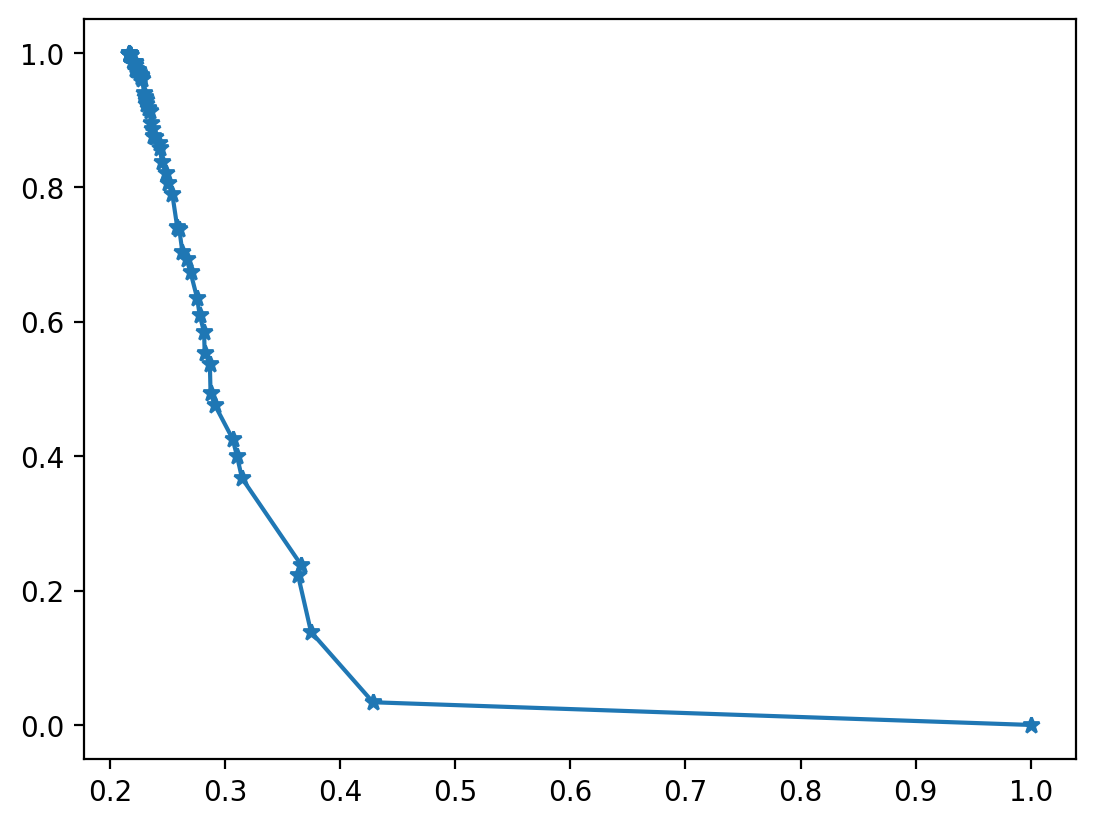

In [76]:
plt.plot(precision_metric[0], precision_metric[1], '*-')

In [77]:
y_pred_proba = limit_bal_lr.predict_proba(X_train)
y_pred_proba

array([[0.69361022, 0.30638978],
       [0.78476701, 0.21523299],
       [0.94581702, 0.05418298],
       ...,
       [0.55088894, 0.44911106],
       [0.73522868, 0.26477132],
       [0.92064596, 0.07935404]])

In [78]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.30638978, 0.21523299, 0.05418298, ..., 0.44911106, 0.26477132,
       0.07935404])

In [79]:
pos_sample_pos_proba = pos_proba[y_train == 1]
neg_sample_pos_proba = pos_proba[y_train == 0]
pos_sample_pos_proba

array([0.30638978, 0.21523299, 0.44911106, ..., 0.2269563 , 0.44911106,
       0.26477132])

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pos_proba)

Text(0.5, 1.0, 'ROC curve')

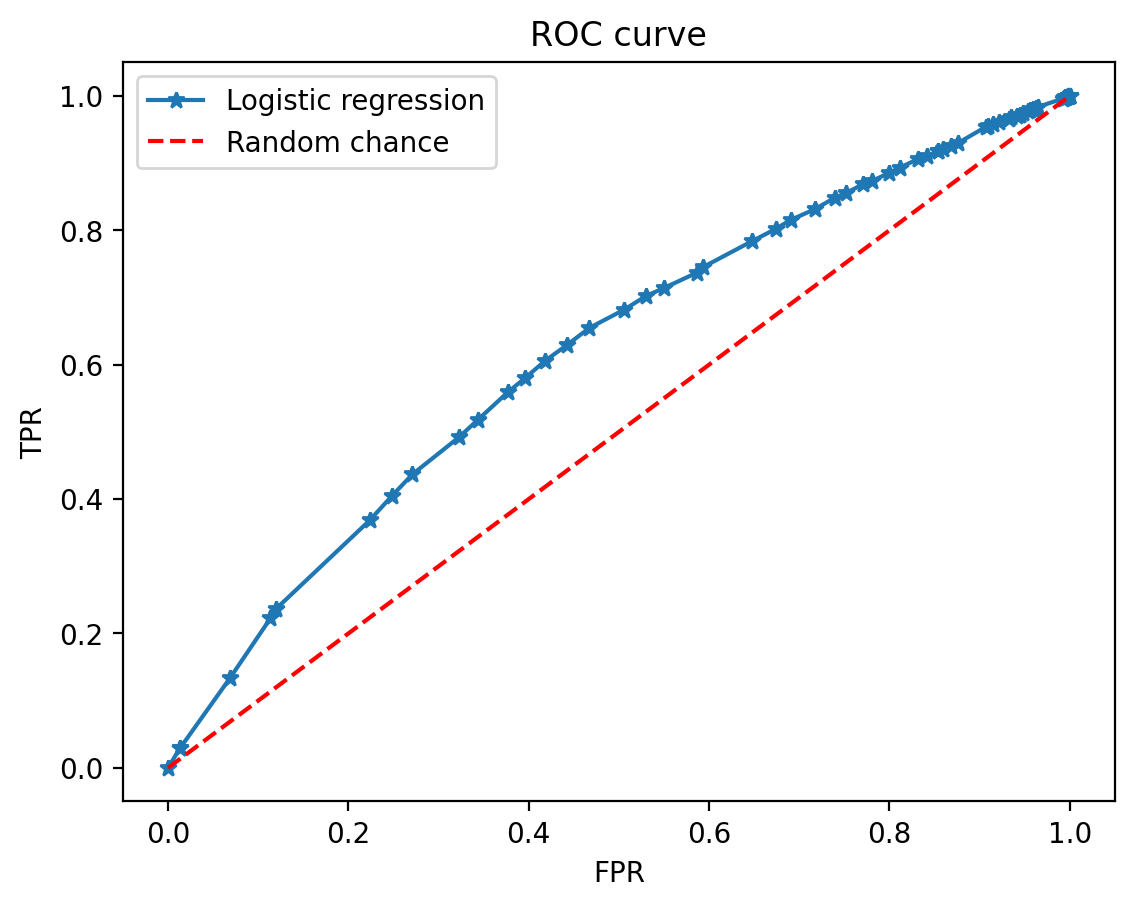

In [81]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [82]:
metrics.roc_auc_score(y_train, pos_proba)

0.6182918113358344